In [1]:
import tensorflow as tf
import glob
import numpy as np
from matplotlib import pyplot as plt
import json

# Load data

In [2]:
@tf.function
def read_norm_img(image_path):
    img = tf.io.decode_jpeg(tf.io.read_file(image_path))
    img_norm = tf.cast(img, tf.float32)
    img_norm = tf.image.resize(img_norm, [224, 224])
    img_norm = (img_norm / 127.5) - 1
    
    return tf.expand_dims(img_norm, axis=0), img

In [3]:
images = glob.glob('data/samplemovieposters/SampleMoviePosters/*.jpg')

In [4]:
with open('labels.json', 'r') as json_file:
    labels_index = json.loads(json_file.read())

In [5]:
dataset = tf.data.Dataset.from_tensor_slices(images)
norm_dataset = dataset.map(read_norm_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Load model

In [6]:
model = tf.keras.models.load_model('weights/07-genre-0.38.h5', compile=False)

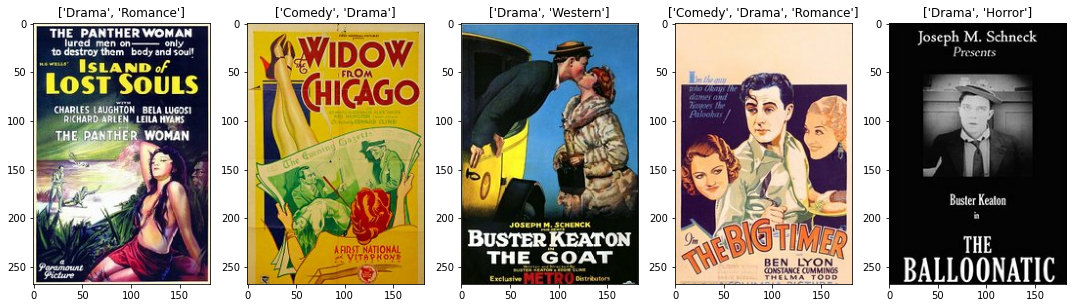

In [16]:
plt.figure(figsize=(15, 10))
count = 0
for img_norm, img in norm_dataset.shuffle(1024).take(5):
    titles = []
    preds = model.predict(img_norm)
    
    selected_genre = np.where(preds >= 0.4)[1]
    for genre in selected_genre:
        titles.append(labels_index[str(genre)])
    
    count += 1
    plt.subplot(1, 5, count)
    plt.title(titles)
    plt.imshow(img)
    
plt.tight_layout()